<h3>Aim: Fill missing values and remove outliers using standard deviation</h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns  

In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [5]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [6]:
df.fillna(df.mean(), inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [59]:
def remove_outliers(df, threshold=2):
    mean = df.mean()
    std = df.std()
    # Filter out rows where any value is outside of mean ± 2 * std
    return df[(df - mean).abs() <= threshold * std].dropna()

# Apply function to remove outliers for features only (excluding 'target')
df_no_outliers = remove_outliers(df.drop('target', axis=1))

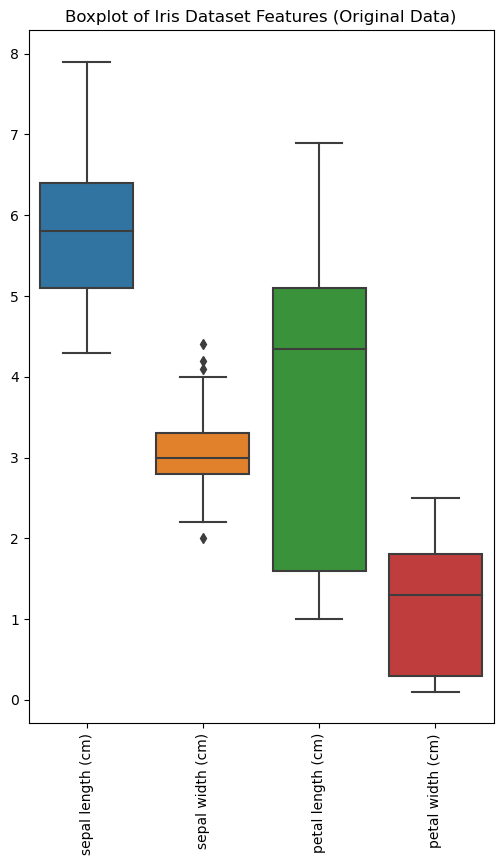

In [63]:
plt.figure(figsize=(6, 9))
sns.boxplot(data=df.drop('target', axis=1))  # Exclude the target column for boxplot
plt.title('Boxplot of Iris Dataset Features (Original Data)')
plt.xticks(rotation=90)
plt.show()

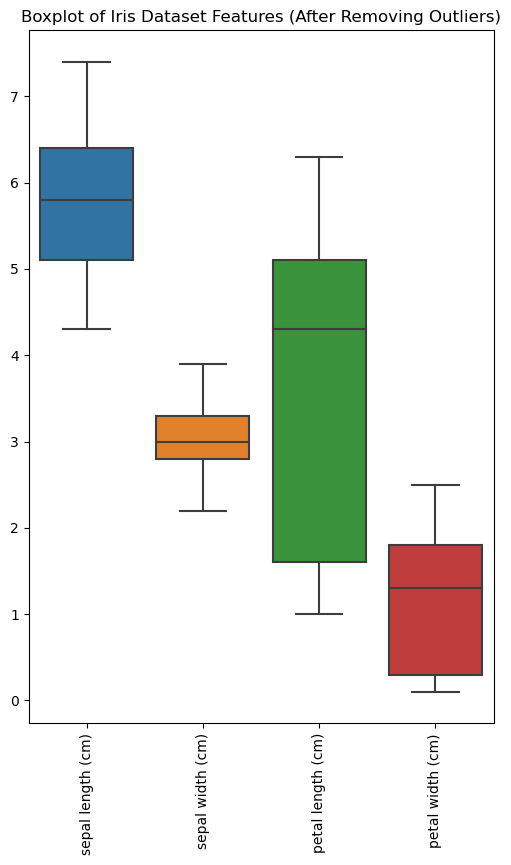

In [65]:

plt.figure(figsize=(6, 9))
sns.boxplot(data=df_no_outliers)  # Boxplot of data after removing outliers
plt.title('Boxplot of Iris Dataset Features (After Removing Outliers)')
plt.xticks(rotation=90)
plt.show()

In [66]:
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (150, 5)
Dataset shape after removing outliers: (139, 4)


In [43]:
print(df_no_outliers )

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
